In [106]:
# https://www.kaggle.com/datasets/christofferms/pokemon-with-stats-and-image/data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("pokedex.csv")

data = data.iloc[:, 2:]
data = data.rename(columns={"Type 1": "FirstEl", "Type 2": "SecondEl"})

data

,Name,FirstEl,SecondEl,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,Charmander,Fire,NaN,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
1210,Iron Crown,Steel,Psychic,590,90,72,100,122,108,98
1211,Terapagos Normal Form,Normal,NaN,450,90,65,85,65,85,60
1212,Terapagos Terastal Form,Normal,NaN,600,95,95,110,105,110,85
1213,Terapagos Stellar Form,Normal,NaN,700,160,105,110,130,110,85


Snažil jsem se najít si vlastní dataset, který by mě zajímal a nakonec jsem nečekaně skončil u pokémonů, kde jsem si řekl, že by to mohl být zajímavý dataset na analýzu. Dataset obsahuje pokémony z 1-9 řady pokémonů.

Konkrétně u tohoto datasetu máme záznam o 1215 pokémonech s tím, že známe typy pokémonů, jejich podrobné statistiky, takže budeme schopni určit trend pokémonů, kterých je nejvíce, kteří jsou nejsilnější a poté utvořit shlukování, které pravděpodobně bude shlukovat podle typů pokémonů.

U datasetu máme celkově 12 sloupců, kde rovnou dropnu 1. sloupec s "Image", protože pro mé účely není vůbec potřeba tento sloupec s odkazem na obrázek k danému pokémonovi mít. Taktéž "Index" sloupec hned následující dropnu, protože číselné označení pokémonů pro mě nemá žádný význam. Taktéž název pokémona mě moc nezajímá, protože mi nijak nebude určovat nic v datasetu a nejsem schopný k němu vázat žádné závislosti.

Po očištění datasetu nám tedy zbývá 9 sloupců.

Type 1 - 1. typ (element) pokémona

Type 2 - _.._ (může být NaN)

Total - součet všech hodnot (Dá se říct měřítko síly pokémona celkově)

HP - životy pokémona

Attack - Poškození pokémona

Defense - Obrana pokémona

SP. Atk. - Poškození pomocí schopnosti

SP. Def - Obrana proti schopnostem

Speed - Rychlost pohybu pokémona

Sloupec (Type 1, Type 2) si dovolím přejmenovat na FirstEl a SecondEl.

In [107]:
data.isna().sum()

Name          0
FirstEl       0
SecondEl    546
Total         0
HP            0
Attack        0
Defense       0
SP. Atk.      0
SP. Def       0
Speed         0
dtype: int64

Jak můžeme vidět, všechny sloupce až na SecondEl mají hodnoty. Jelikož je pro nás 2. sloupec důležitý a nemůžeme se ho zbavit, vyplním veškeré chybějí hodnoty třeba stringem "null" a později ho můžu vyfiltrovat v grafech a různých ukázkách a počtech.

In [108]:
data.fillna("None", inplace=True)

sum(1 if " Mega " in word else 0 for word in data["Name"])    # Spočítání slova "Mega" ve jméně

48

Nyní je všechno nahrazené za "None" hodnoty.

V tuto chvíli mě tak ale napadlo, že bych mohl dataset sám rozšířit o nové sloupce. Pokémoni totiž mají své vylepšení a potom i "Mega" formy, které jsou víceméně jejich vylepšená verze. Přidám proto nový sloupec, který určuje, zdali je pokémon v mega formě nebo ne. Z mého dotazu je vidět, že z 1215 pokémonů má 48 Mega formu. Mám jistotu, že pokémon neobsahuje slovo Mega, protože se ptám na " Mega ", což znamená, že má před i po slově "Mega" nějaké další slova, což všichni pokémoni mají, pokud mají v názvu Mega formu. Ale tím eliminuji omylem zahrnout pokémony třeba s názvem "Meganium"

In [109]:
data["Mega"] = [1 if " Mega " in word else 0 for word in data["Name"]]

data.insert(3, "Mega", data.pop("Mega"))

data

,Name,FirstEl,SecondEl,Mega,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,Bulbasaur,Grass,Poison,0,318,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,0,405,60,62,63,80,80,60
2,Venusaur,Grass,Poison,0,525,80,82,83,100,100,80
3,Venusaur Mega Venusaur,Grass,Poison,1,625,80,100,123,122,120,80
4,Charmander,Fire,None,0,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...,...
1210,Iron Crown,Steel,Psychic,0,590,90,72,100,122,108,98
1211,Terapagos Normal Form,Normal,None,0,450,90,65,85,65,85,60
1212,Terapagos Terastal Form,Normal,None,0,600,95,95,110,105,110,85
1213,Terapagos Stellar Form,Normal,None,0,700,160,105,110,130,110,85


Tady vidíme nový dataset se sloupcem, který určuje "Mega" toho, jestli pokémon je či není.

Nyní se vrhneme do nějakých grafů, shall we?

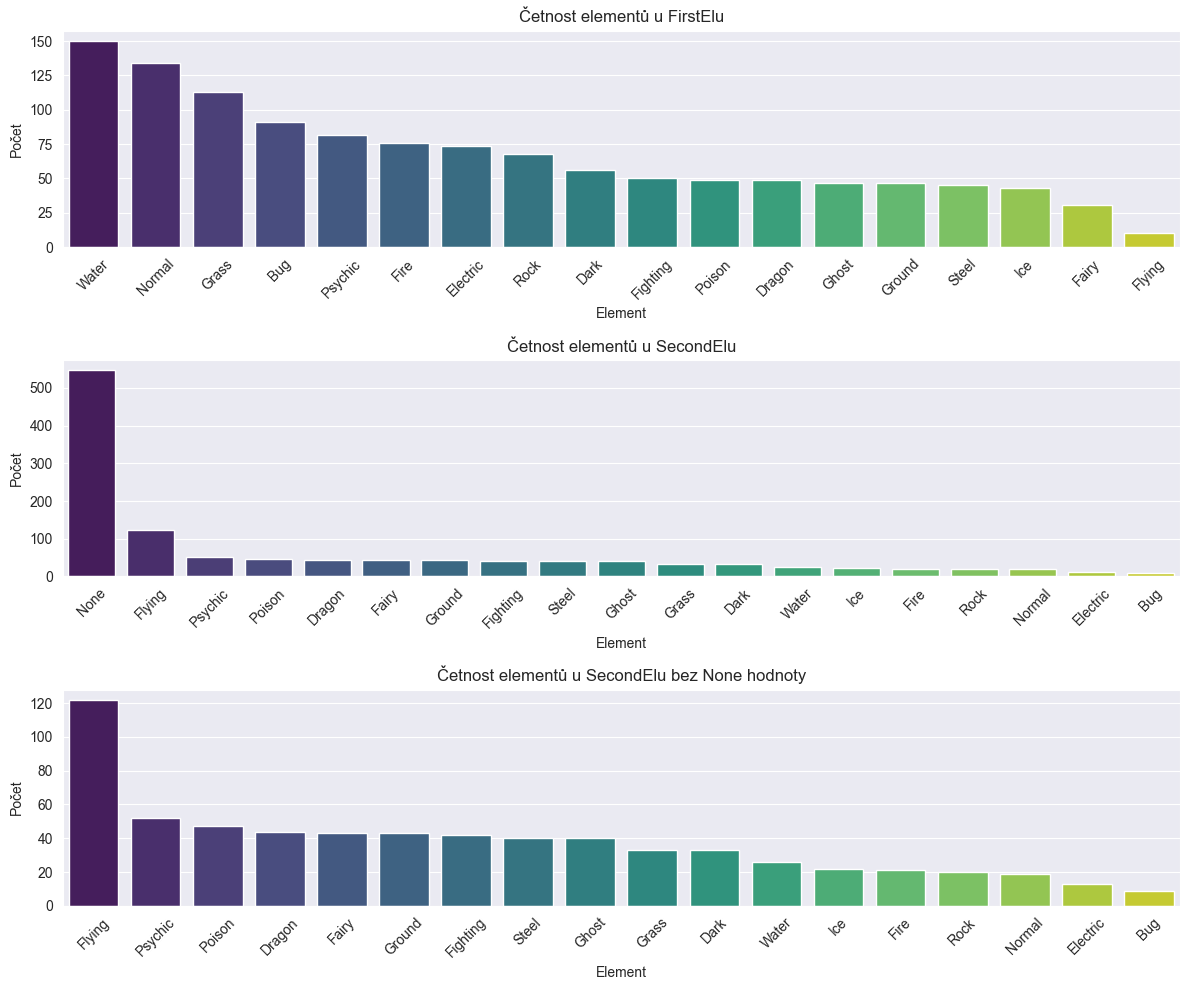

In [110]:
first_el = data["FirstEl"].value_counts()
second_el = data["SecondEl"].value_counts()
second_el_without_none = data["SecondEl"].value_counts().iloc[1:]

plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
sns.barplot(x=first_el.index, y=first_el.values, hue=first_el.index, legend=False, palette='viridis')
plt.title("Četnost elementů u FirstElu")
plt.xlabel("Element")
plt.ylabel("Počet")
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
sns.barplot(x=second_el.index, y=second_el.values, hue=second_el.index, legend=False, palette='viridis')
plt.title("Četnost elementů u SecondElu")
plt.xlabel("Element")
plt.ylabel("Počet")
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
sns.barplot(x=second_el_without_none.index, y=second_el_without_none.values, hue=second_el_without_none.index, legend=False, palette='viridis')
plt.title("Četnost elementů u SecondElu bez None hodnoty")
plt.xlabel("Element")
plt.ylabel("Počet")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Jak vidíme, z 1. grafu četnosti podle 1. elementu je celkem zajímavé, že převládají zrovna vodní pokémoni a graf má celkem tvar funkce (1/x). To samé se dá říct o 3. grafu, kde ale ten rozdíl není na tolik markantní.

Ten 2. graf je čistě pro ukázku jak moc převládá prázdný element u 2. elementu.

In [111]:
print((1 - (second_el_without_none.iloc[0] / sum(second_el_without_none.iloc[1:]))) * 100)

77.6965265082267


Skoro 78% pokémonů nemá 2. typ.

Než se vrhnu na práci s čísly statistik jednotlivých pokémonů, ještě bych se chtěl pozastavit nad rozložením "síly". Pokémoni totiž mají svojí sílu v sloupci "Total", podle které se dá víceméně měřit síla jednotlivých pokémonů. Zkusíme tedy vykreslit to a uvidíme jaké je rozložení.

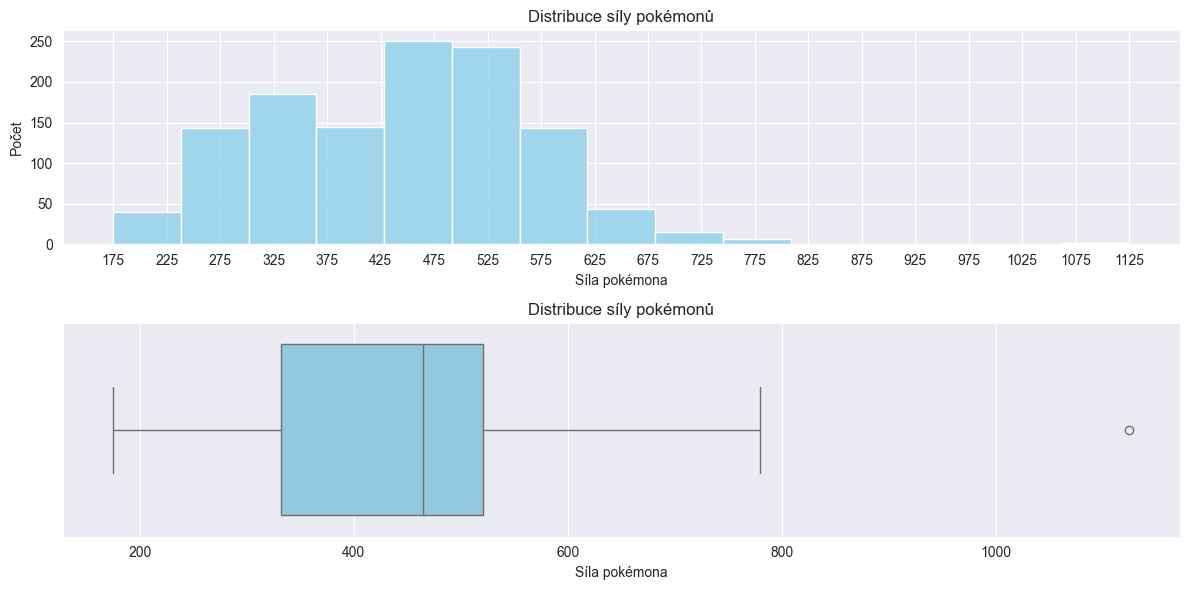

<Figure size 640x480 with 0 Axes>

In [112]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
sns.histplot(data["Total"], bins=15, color='skyblue')
plt.title("Distribuce síly pokémonů")
plt.xlabel("Síla pokémona")
plt.xticks(range(min(data["Total"]), max(data["Total"]) + 1, 50))
plt.ylabel("Počet")

plt.subplot(2, 1, 2)
sns.boxplot(x=data["Total"], color='skyblue')
plt.title("Distribuce síly pokémonů")
plt.xlabel("Síla pokémona")
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

Vidíme, že distribuce síly pokémonů je nejsilnější mezi 400 a 600, což je víceméně průměr hodnoty (+- 0-1200), dalo by se říct, že je zde vidět i přirozené rozdělení (Gaussovu křivku) v kterou jsem tak trochu doufal, že bych ji tu mohl najít. ALE vidíme jednoho osamělého pokémona, který je osamělý a výjimka oproti všem svým pokémonům, tak se podíváme, kdo to je.



In [113]:
print(data.loc[data['Total'].idxmax()])

Name        Eternatus Eternamax
FirstEl                  Poison
SecondEl                 Dragon
Mega                          0
Total                      1125
HP                          255
Attack                      115
Defense                     250
SP. Atk.                    125
SP. Def                     250
Speed                       130
Name: 1058, dtype: object


Pokémon Eternatus Eternamax je očividně velmi silný oproti zbytku pokémonům. V této situaci, než budeme pokračovat dál, by bylo dobré se zaměřit na outliery, ale upřímně, tento dataset je natolik hezky rozdělený, že toto je víceméně jediný outlier, který tu leží. Odstranil bych ho proto ručně a zbytek nechám. Ještě jednou ukážu distribuci bez outliera.

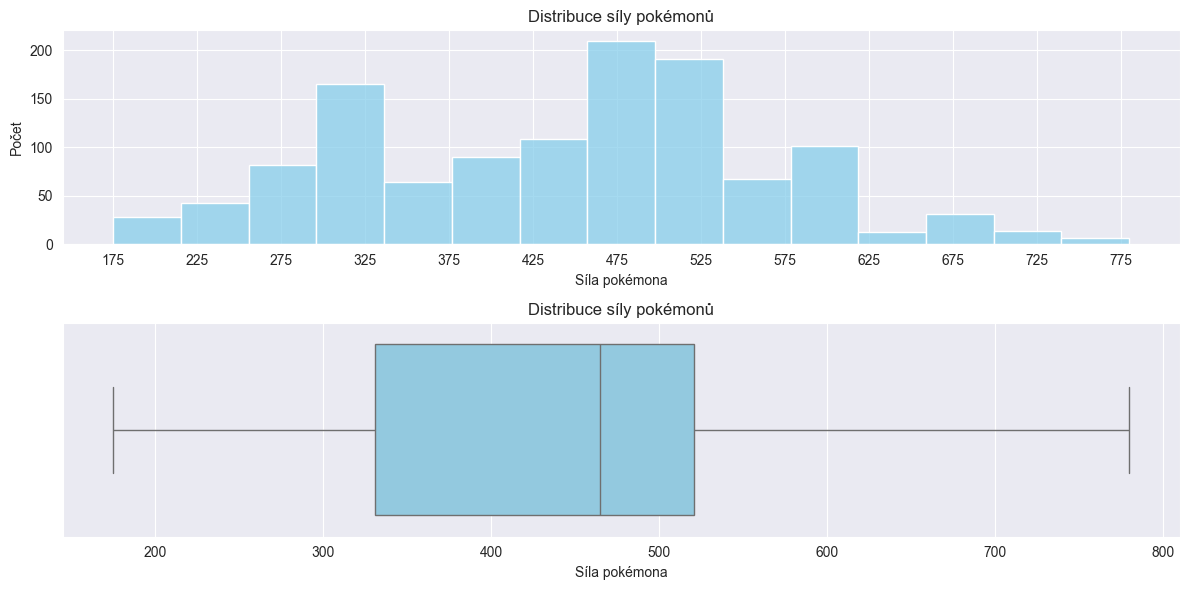

<Figure size 640x480 with 0 Axes>

In [114]:
outlier_id = data["Total"].idxmax()

data.drop(outlier_id, inplace=True)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
sns.histplot(data["Total"], bins=15, color='skyblue')
plt.title("Distribuce síly pokémonů")
plt.xlabel("Síla pokémona")
plt.xticks(range(min(data["Total"]), max(data["Total"]) + 1, 50))
plt.ylabel("Počet")

plt.subplot(2, 1, 2)
sns.boxplot(x=data["Total"], color='skyblue')
plt.title("Distribuce síly pokémonů")
plt.xlabel("Síla pokémona")
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

Nyní vidíme tedy dataset očištěný o jediného outliera. Přesuneme se od grafů ke korelační matici, která by nám mohla ukázat, jak na sobě závislý jednotlivé parametry pokémona s jeho elementem a nebo jak jsou na sobě jednotlivé parametry závislé.

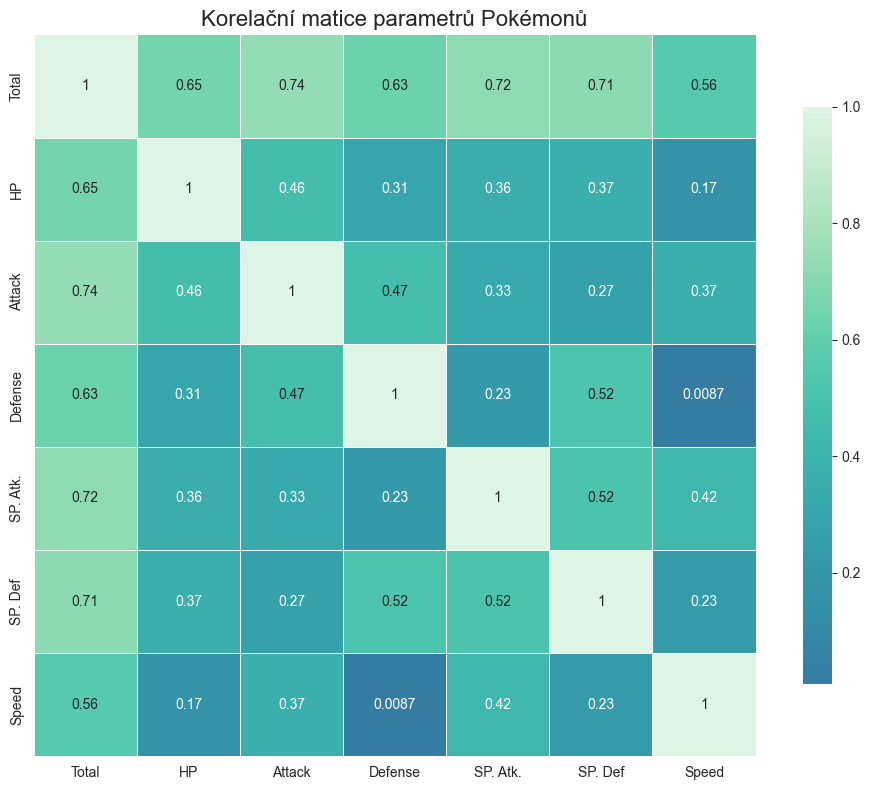

In [119]:
correlation_matrix = data[['Total', 'HP', 'Attack', 'Defense', 'SP. Atk.', 'SP. Def', 'Speed']].corr()

# Vizualizace
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='mako', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Korelační matice parametrů Pokémonů', fontsize=16)
plt.tight_layout()
plt.show()

Upřímně, tady není vidět nic moc zajímavého. Vidíme, že pokémoni se nejvíce podílí poškozením na "total" (čili celkové skóré) a je tam nějaká korelace v místech:

Attack a HP, očividně pokémoni, kteří mají poškození velké, tak mají i hodně životů

Defense a SP. Def, to znamená, že pokud pokémon je odolný dost, bude mít i velkou odolnost proti schopnostem